### Case Study - Honey Production

Source Credit : https://www.kaggle.com/jessicali9530/honey-production

#### Context
In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component to American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees causing the remaining hive colony to collapse. Speculation to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. Twelve years later, some industries are observing recovery but the American honey industry is still largely struggling. The U.S. used to locally produce over half the honey it consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America by state from 1998 to 2012.

#### Content
The National Agricultural Statistics Service (NASS) is the primary data reporting body for the US Department of Agriculture (USDA). NASS's mission is to "provide timely, accurate, and useful statistics in service to U.S. agriculture". From datasets to census surveys, their data covers virtually all aspects of U.S. agriculture. Honey production is one of the datasets offered. Click here for the original page containing the data along with related datasets such as Honey Bee Colonies and Cost of Pollination. Data wrangling was performed in order to clean the dataset. honeyproduction.csv is the final tidy dataset suitable for analysis. The three other datasets (which include "honeyraw" in the title) are the original raw data downloaded from the site. They are uploaded to this page along with the "Wrangling The Honey Production Dataset" kernel as an example to show users how data can be wrangled into a cleaner format. Useful metadata on certain variables of the honeyproduction dataset is provided below:

  - numcol: Number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies which did not survive the entire year
  - yieldpercol: Honey yield per colony. Unit is pounds
  - totalprod: Total production (numcol x yieldpercol). Unit is pounds
  - stocks: Refers to stocks held by producers. Unit is pounds
  - priceperlb: Refers to average price per pound based on expanded sales. Unit is dollars.
  - prodvalue: Value of production (totalprod x priceperlb). Unit is dollars.
  - Other useful information: Certain states are excluded every year (ex. CT) to avoid disclosing data for individual operations. Due to rounding, total colonies multiplied by total yield may not equal production. Also, summation of states will not equal U.S. level value of production.


#### Acknowledgements
Honey production data was published by the National Agricultural Statistics Service (NASS) of the U.S. Department of Agriculture. The beautiful banner photo was by Eric Ward on Unsplash.

#### Inspiration
   - How has honey production yield changed from 1998 to 2012?
   - Over time, which states produce the most honey? Which produce the least? Which have experienced the most change in honey yield?
   - Does the data show any trends in terms of the number of honey producing colonies and yield per colony before 2006, which was when concern over Colony Collapse Disorder spread nationwide?
   - Are there any patterns that can be observed between total honey production and value of production every year?
   - How has value of production, which in some sense could be tied to demand, changed every year?


#### Import pandas, numpy, seaborn packages

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#### Import the honeyproduction.csv file

In [3]:
df = pd.read_csv('honeyproduction.csv')
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


#### Explore the data for non-null and extreme values

In [4]:
df.isnull().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

In [5]:
df.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

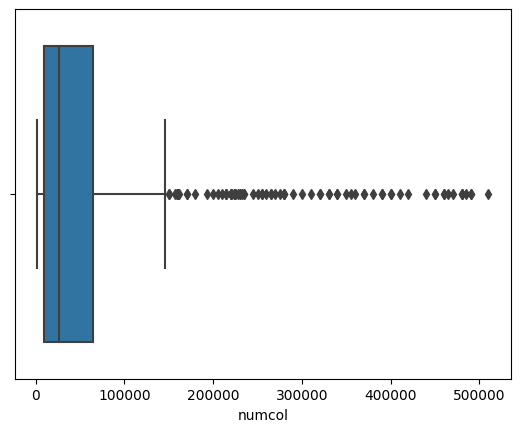

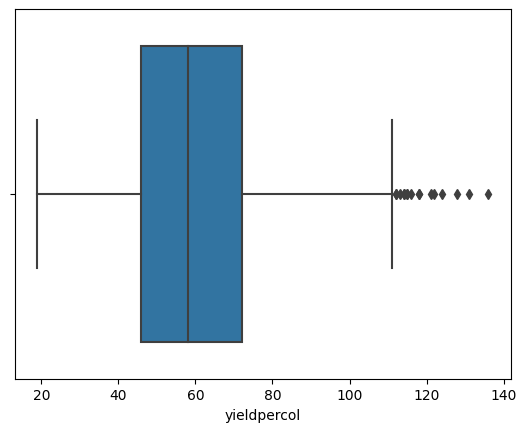

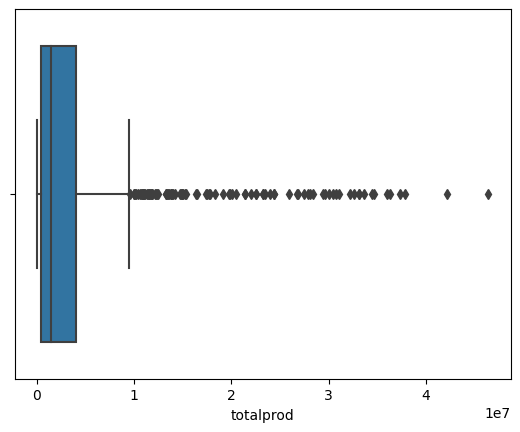

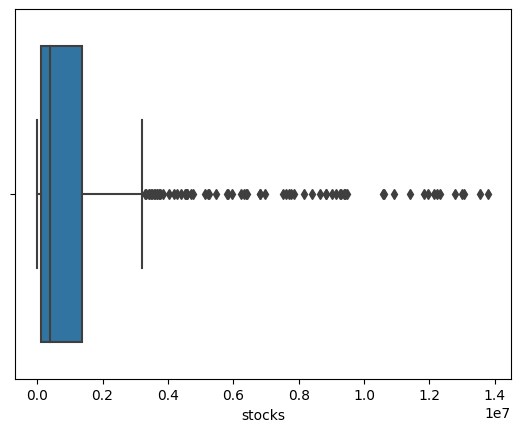

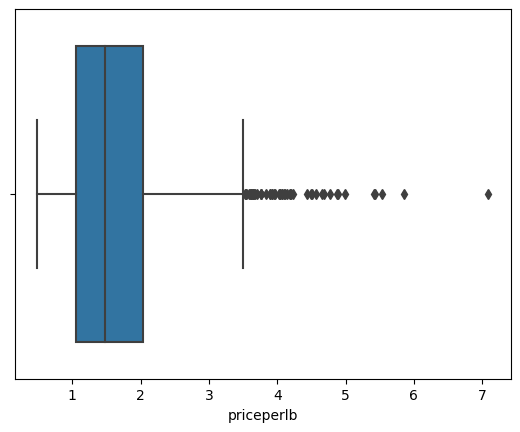

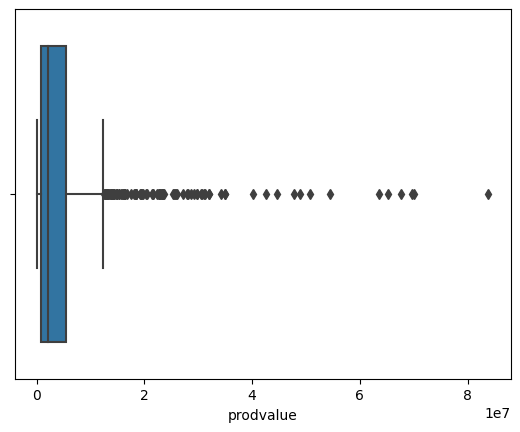

In [6]:
for i in ['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']:
    sns.boxplot(data = df, x = i)
    plt.show()

<Axes: xlabel='prodvalue'>

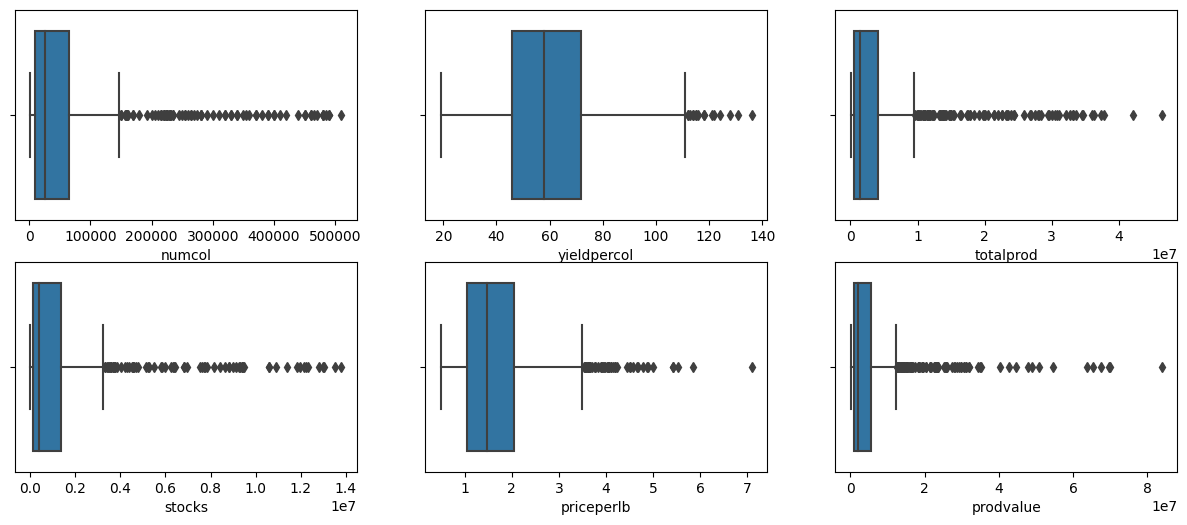

In [7]:
plt.figure(figsize=(15,6))

plt.subplot(2, 3, 1)
sns.boxplot(data = df, x = 'numcol')

plt.subplot(2, 3, 2)
sns.boxplot(data = df, x = 'yieldpercol')

plt.subplot(2, 3, 3)
sns.boxplot(data = df, x = 'totalprod')

plt.subplot(2, 3, 4)
sns.boxplot(data = df, x = 'stocks')

plt.subplot(2, 3, 5)
sns.boxplot(data = df, x = 'priceperlb')

plt.subplot(2, 3, 6)
sns.boxplot(data = df, x = 'prodvalue')

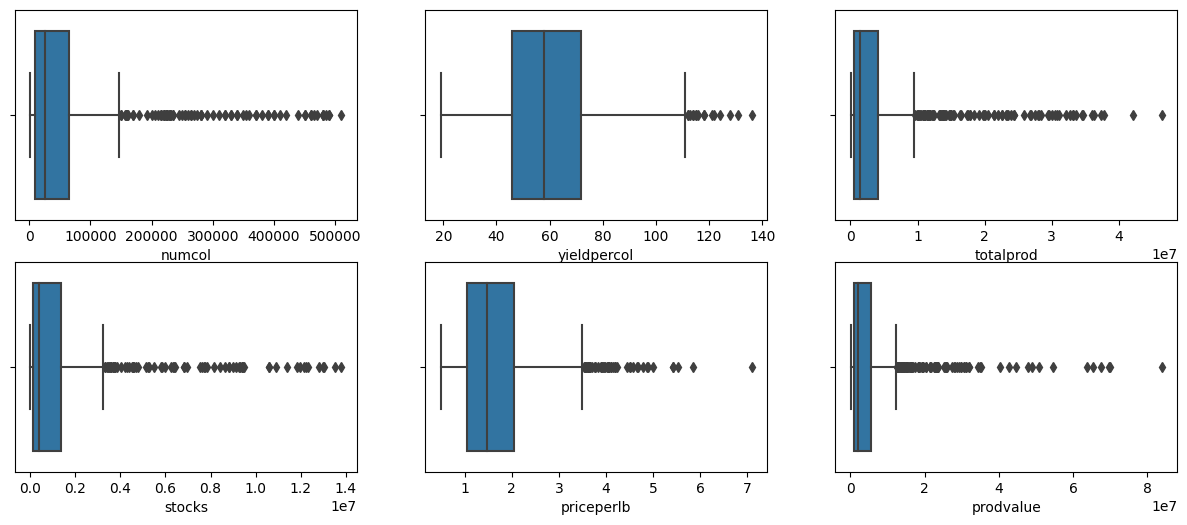

In [9]:
x = 1

plt.figure(figsize=(15, 6))

for i in ['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']:
    plt.subplot(2, 3, x)
    sns.boxplot(data = df, x = i)
   # plt.show()
    x += 1

<Axes: xlabel='numcol'>

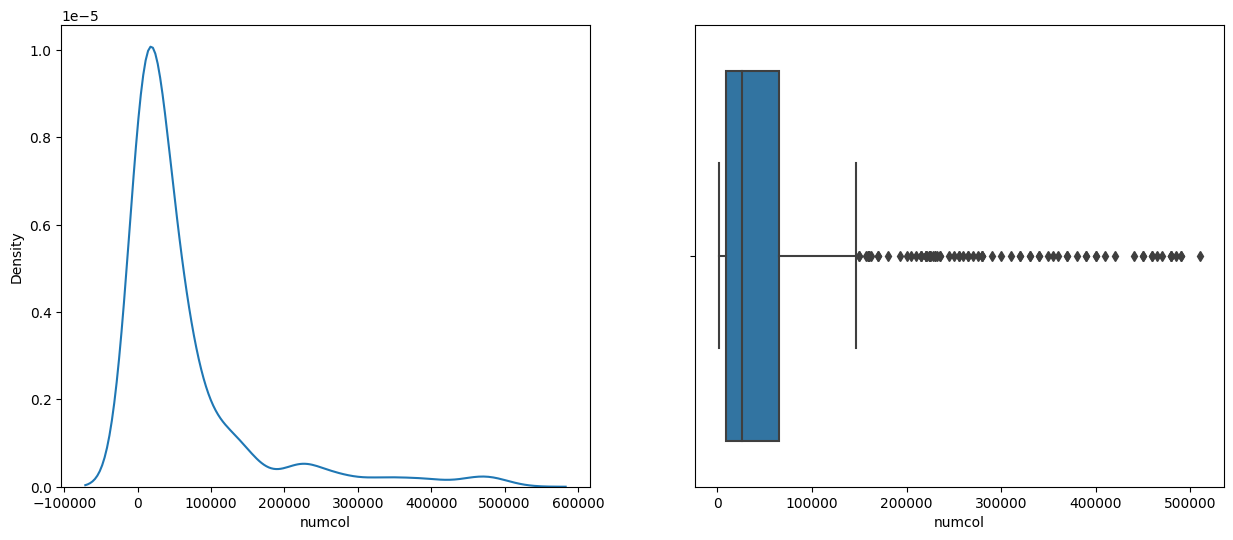

In [11]:
plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(data = df, x = 'numcol')

plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'numcol')

#### How many States are included in the dataset?

In [12]:
df['state'].nunique()

44

#### Which are the States that are included in this dataset?

In [13]:
df['state'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'South Carolina'], dtype=object)

In [14]:
set(df['state'])

{'Alabama',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming'}

#### Calculate the average production for each state across all years

2 ways to do it

In [15]:
df.groupby('state')['totalprod'].mean()

state
Alabama           7.268421e+05
Arizona           1.845158e+06
Arkansas          2.538158e+06
California        2.054289e+07
Colorado          1.638684e+06
Florida           1.567358e+07
Georgia           3.362053e+06
Hawaii            9.661579e+05
Idaho             4.124316e+06
Illinois          4.784737e+05
Indiana           4.528421e+05
Iowa              2.008053e+06
Kansas            6.338947e+05
Kentucky          2.243684e+05
Louisiana         3.789368e+06
Maine             2.766316e+05
Maryland          2.110000e+05
Michigan          4.936211e+06
Minnesota         9.233263e+06
Mississippi       1.522368e+06
Missouri          7.959474e+05
Montana           1.105921e+07
Nebraska          3.096474e+06
Nevada            4.392727e+05
New Jersey        3.939474e+05
New Mexico        4.764667e+05
New York          3.802421e+06
North Carolina    5.274211e+05
North Dakota      3.286500e+07
Ohio              1.016632e+06
Oklahoma          2.011667e+05
Oregon            2.216789e+06
Pe

In [17]:
pd.pivot_table(data = df, index = 'state', values = 'totalprod')

,totalprod
state,
Alabama,7.268421e+05
Arizona,1.845158e+06
Arkansas,2.538158e+06
California,2.054289e+07
Colorado,1.638684e+06
Florida,1.567358e+07
Georgia,3.362053e+06
Hawaii,9.661579e+05
Idaho,4.124316e+06


In [20]:
pd.crosstab(index = df['state'], columns = ['year'], values = df['totalprod'], aggfunc = 'mean')

col_0,year
state,
Alabama,7.268421e+05
Arizona,1.845158e+06
Arkansas,2.538158e+06
California,2.054289e+07
Colorado,1.638684e+06
Florida,1.567358e+07
Georgia,3.362053e+06
Hawaii,9.661579e+05
Idaho,4.124316e+06


#### How many years data is provided in the dataset? And what is the starting and ending year?

In [22]:
df['year'].nunique()

19

In [23]:
df['year'].describe()

count     785.000000
mean     2006.817834
std         5.491523
min      1998.000000
25%      2002.000000
50%      2007.000000
75%      2012.000000
max      2016.000000
Name: year, dtype: float64

#### Which State has seen highest volume in production, and in which year?

3 Different ways to do it

In [25]:
df.sort_values('totalprod', ascending= False)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
532,North Dakota,510000.0,91,46410000.0,12995000.0,1.50,69615000.0,2010
690,North Dakota,490000.0,86,42140000.0,9271000.0,1.99,83859000.0,2014
770,North Dakota,485000.0,78,37830000.0,6809000.0,1.85,69986000.0,2016
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
730,North Dakota,490000.0,74,36260000.0,9428000.0,1.80,65268000.0,2015
...,...,...,...,...,...,...,...,...
189,Maryland,3000.0,46,138000.0,21000.0,1.96,270000.0,2002
601,Maine,4000.0,34,136000.0,24000.0,2.39,325000.0,2012
639,Kentucky,3000.0,41,123000.0,17000.0,3.25,400000.0,2013
561,Maine,4000.0,30,120000.0,17000.0,1.98,238000.0,2011


In [32]:
pd.pivot_table(data = df, index = ['state', 'year'], values = 'totalprod').sort_values('totalprod', ascending=False)

totalprod
state        year            
North Dakota 2010  46410000.0
             2014  42140000.0
             2016  37830000.0
California   1998  37350000.0
North Dakota 2015  36260000.0
...                       ...
Maryland     2002    138000.0
Maine        2012    136000.0
Kentucky     2013    123000.0
Maine        2011    120000.0
Maryland     2003     84000.0

[785 rows x 1 columns]

#### What is the average yield per colony , for each year?

2 ways to do it

In [33]:
df.groupby('year')['yieldpercol'].mean()

year
1998    69.953488
1999    65.465116
2000    67.581395
2001    64.545455
2002    66.795455
2003    62.545455
2004    64.804878
2005    64.268293
2006    61.853659
2007    59.170732
2008    61.000000
2009    53.850000
2010    56.275000
2011    54.775000
2012    55.175000
2013    52.974359
2014    57.350000
2015    55.325000
2016    54.075000
Name: yieldpercol, dtype: float64

#### Is there correlation between any 2 Numeric variables? Test for the same using Visual techniques

In [ ]:
sns.pairplot(data)

numcol and totalprod have the highest correlation (95%)

In [36]:
correlation = df.select_dtypes(include='number').corr()
correlation

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
numcol,1.000000,0.224539,0.951822,0.820076,-0.211427,0.898989,0.026711
yieldpercol,0.224539,1.000000,0.382945,0.358676,-0.360571,0.255789,-0.248737
totalprod,0.951822,0.382945,1.000000,0.876872,-0.239085,0.895242,-0.040497
stocks,0.820076,0.358676,0.876872,1.000000,-0.275926,0.713161,-0.115520
priceperlb,-0.211427,-0.360571,-0.239085,-0.275926,1.000000,-0.061833,0.733959
prodvalue,0.898989,0.255789,0.895242,0.713161,-0.061833,1.000000,0.188790
year,0.026711,-0.248737,-0.040497,-0.115520,0.733959,0.188790,1.000000


<Axes: >

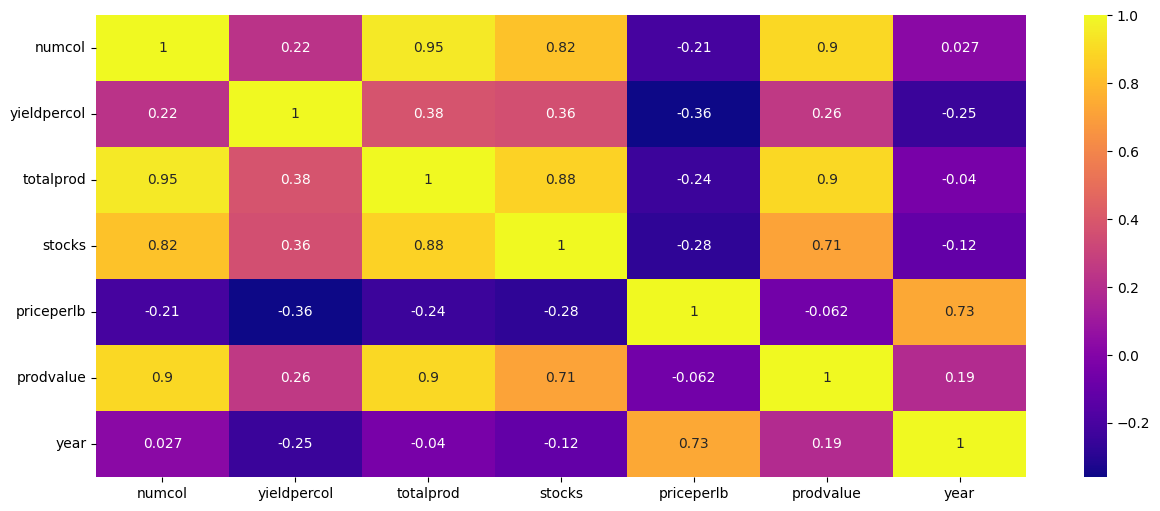

In [40]:
plt.figure(figsize=(15, 6))
sns.heatmap(correlation, annot = True, cmap = 'plasma')

#### What is the general Production trend from 1998 to 2012? Describe visually

C:\Users\gupta\AppData\Local\Temp\ipykernel_32156\469443082.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.pointplot(x = df['year'], y = df['totalprod'], ci = False, estimator=sum)


<Axes: xlabel='year', ylabel='totalprod'>

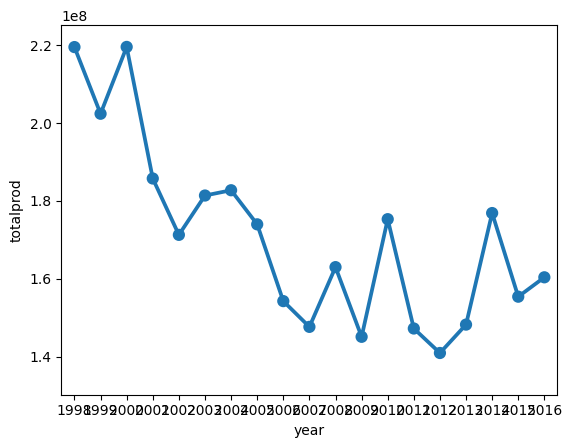

In [43]:
sns.pointplot(x = df['year'], y = df['totalprod'], ci = False, estimator=sum)

#### How is the production trend for each State? Describe visually - Hint (Use sns.FacetGrid() & g.map() functions)

C:\Users\gupta\AppData\Local\Temp\ipykernel_32156\2659769816.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.pointplot(x = df['year'], y = df['totalprod'], ci = False, estimator=sum, hue = df['state'])


<Axes: xlabel='year', ylabel='totalprod'>

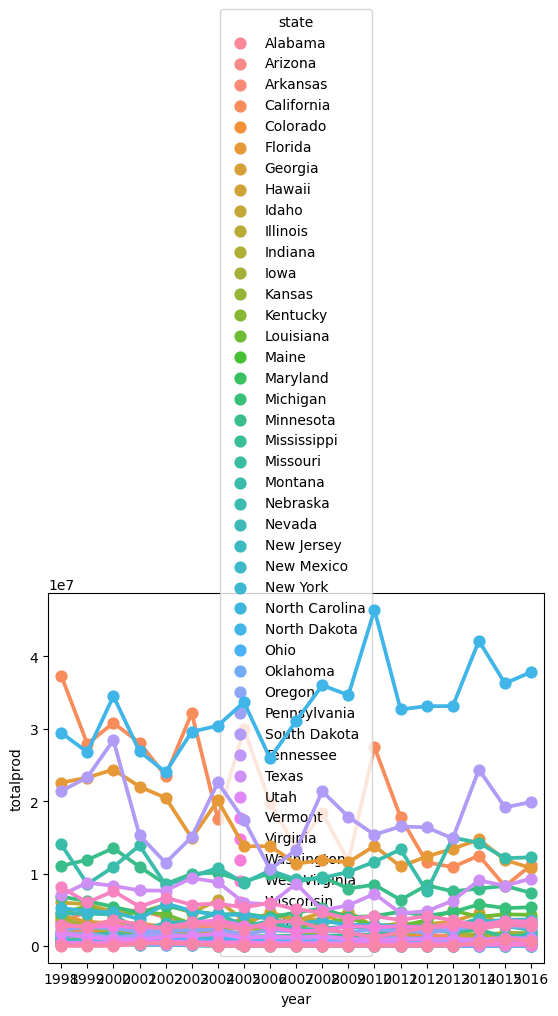

In [44]:
sns.pointplot(x = df['year'], y = df['totalprod'], ci = False, estimator=sum, hue = df['state'])

C:\Users\gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


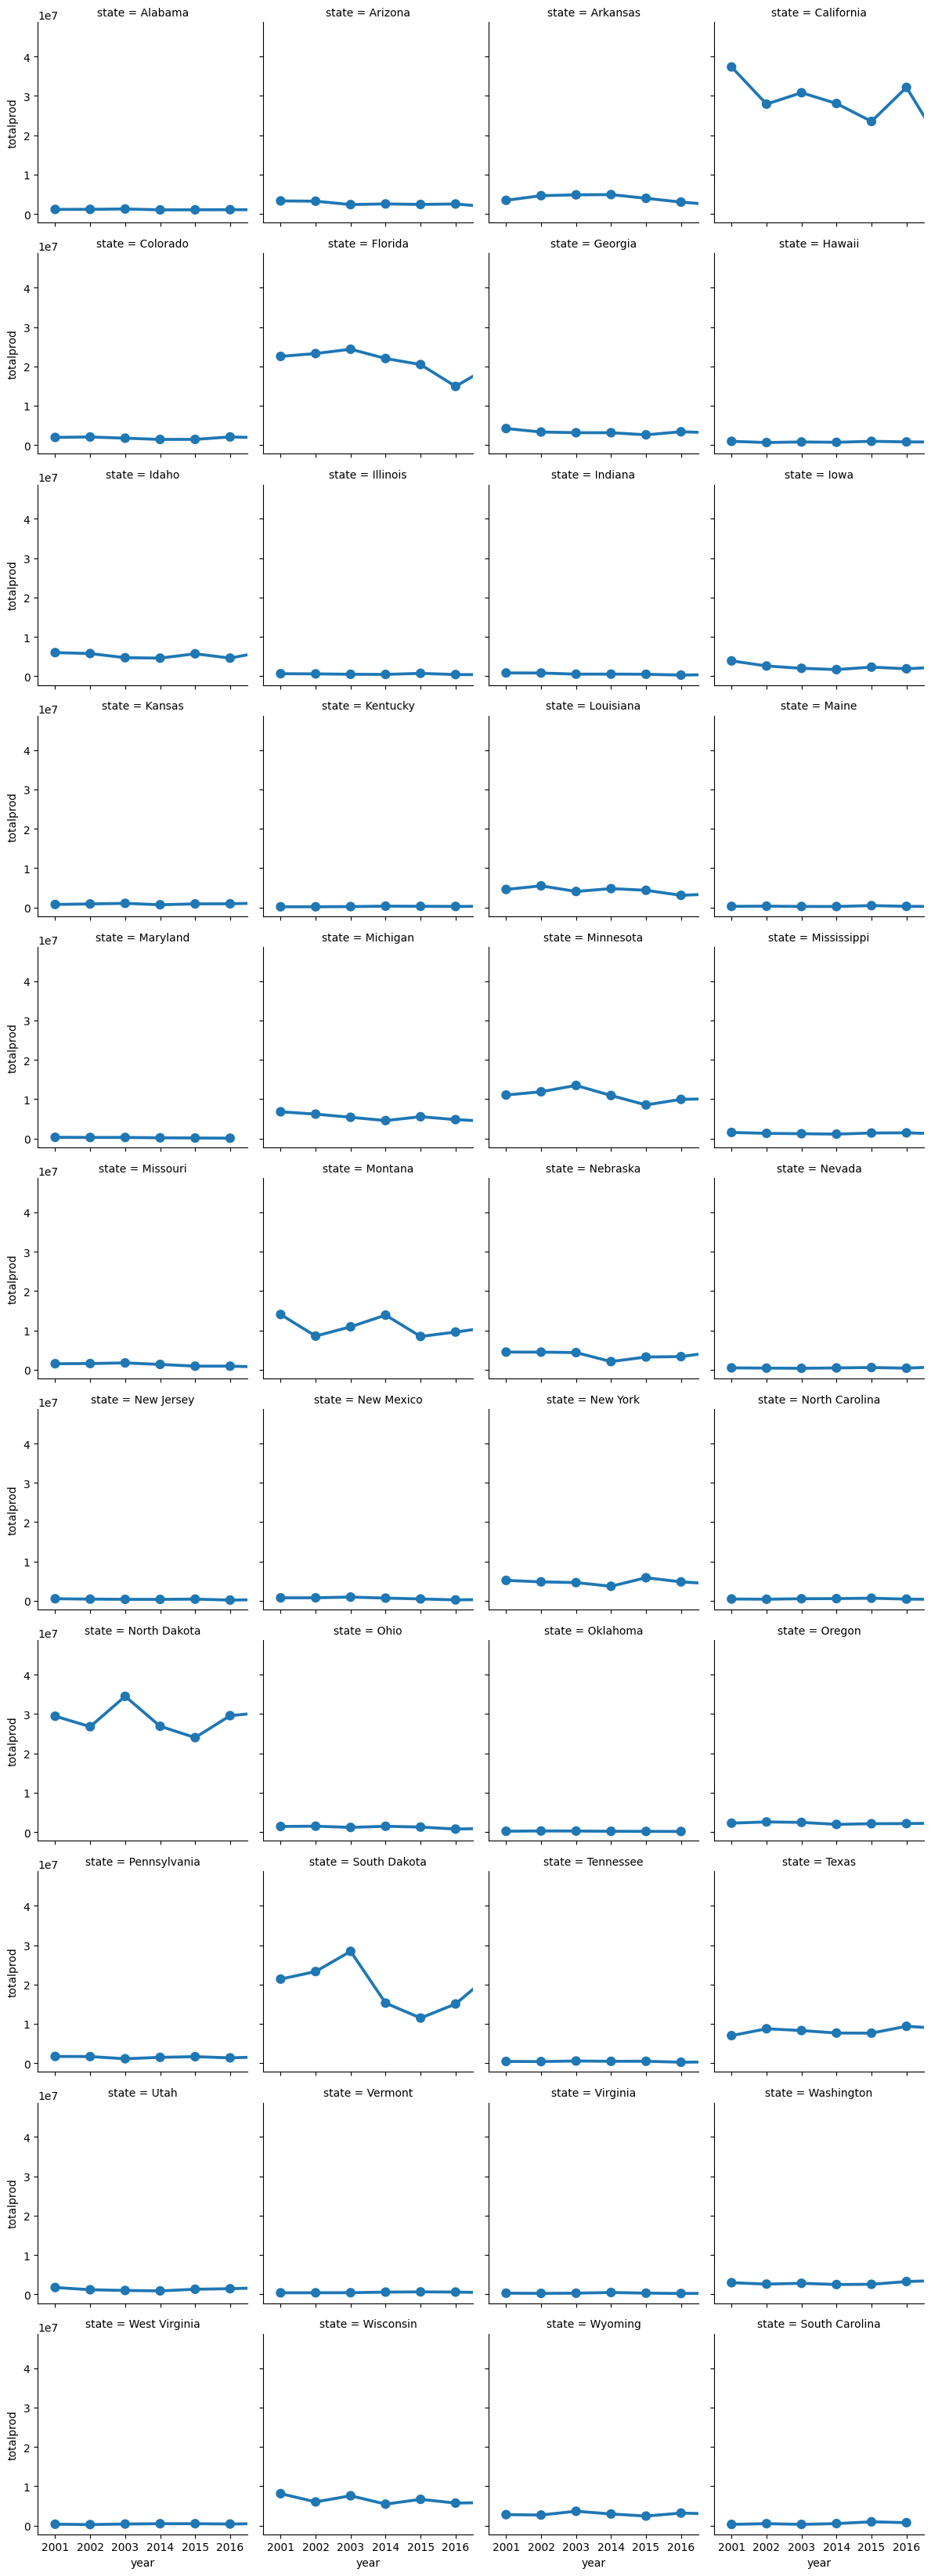

In [47]:
ax = sns.FacetGrid(data = df, col = 'state', col_wrap=4)
ax.map(sns.pointplot, 'year', 'totalprod')

#### Is there a linear relationship between the Number of Colonies & Value in Production? Check at an overall level, at state and year levels as well

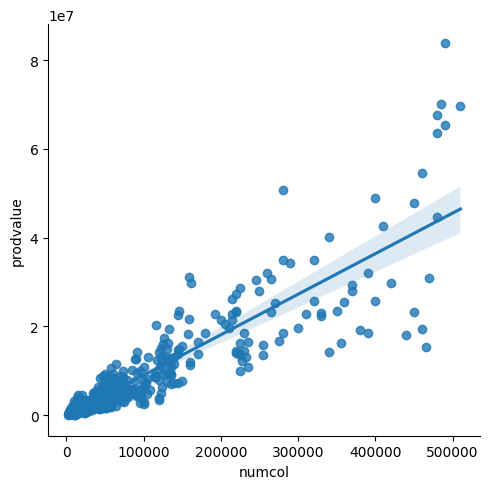

In [48]:
sns.lmplot(data = df, x = 'numcol', y = 'prodvalue')

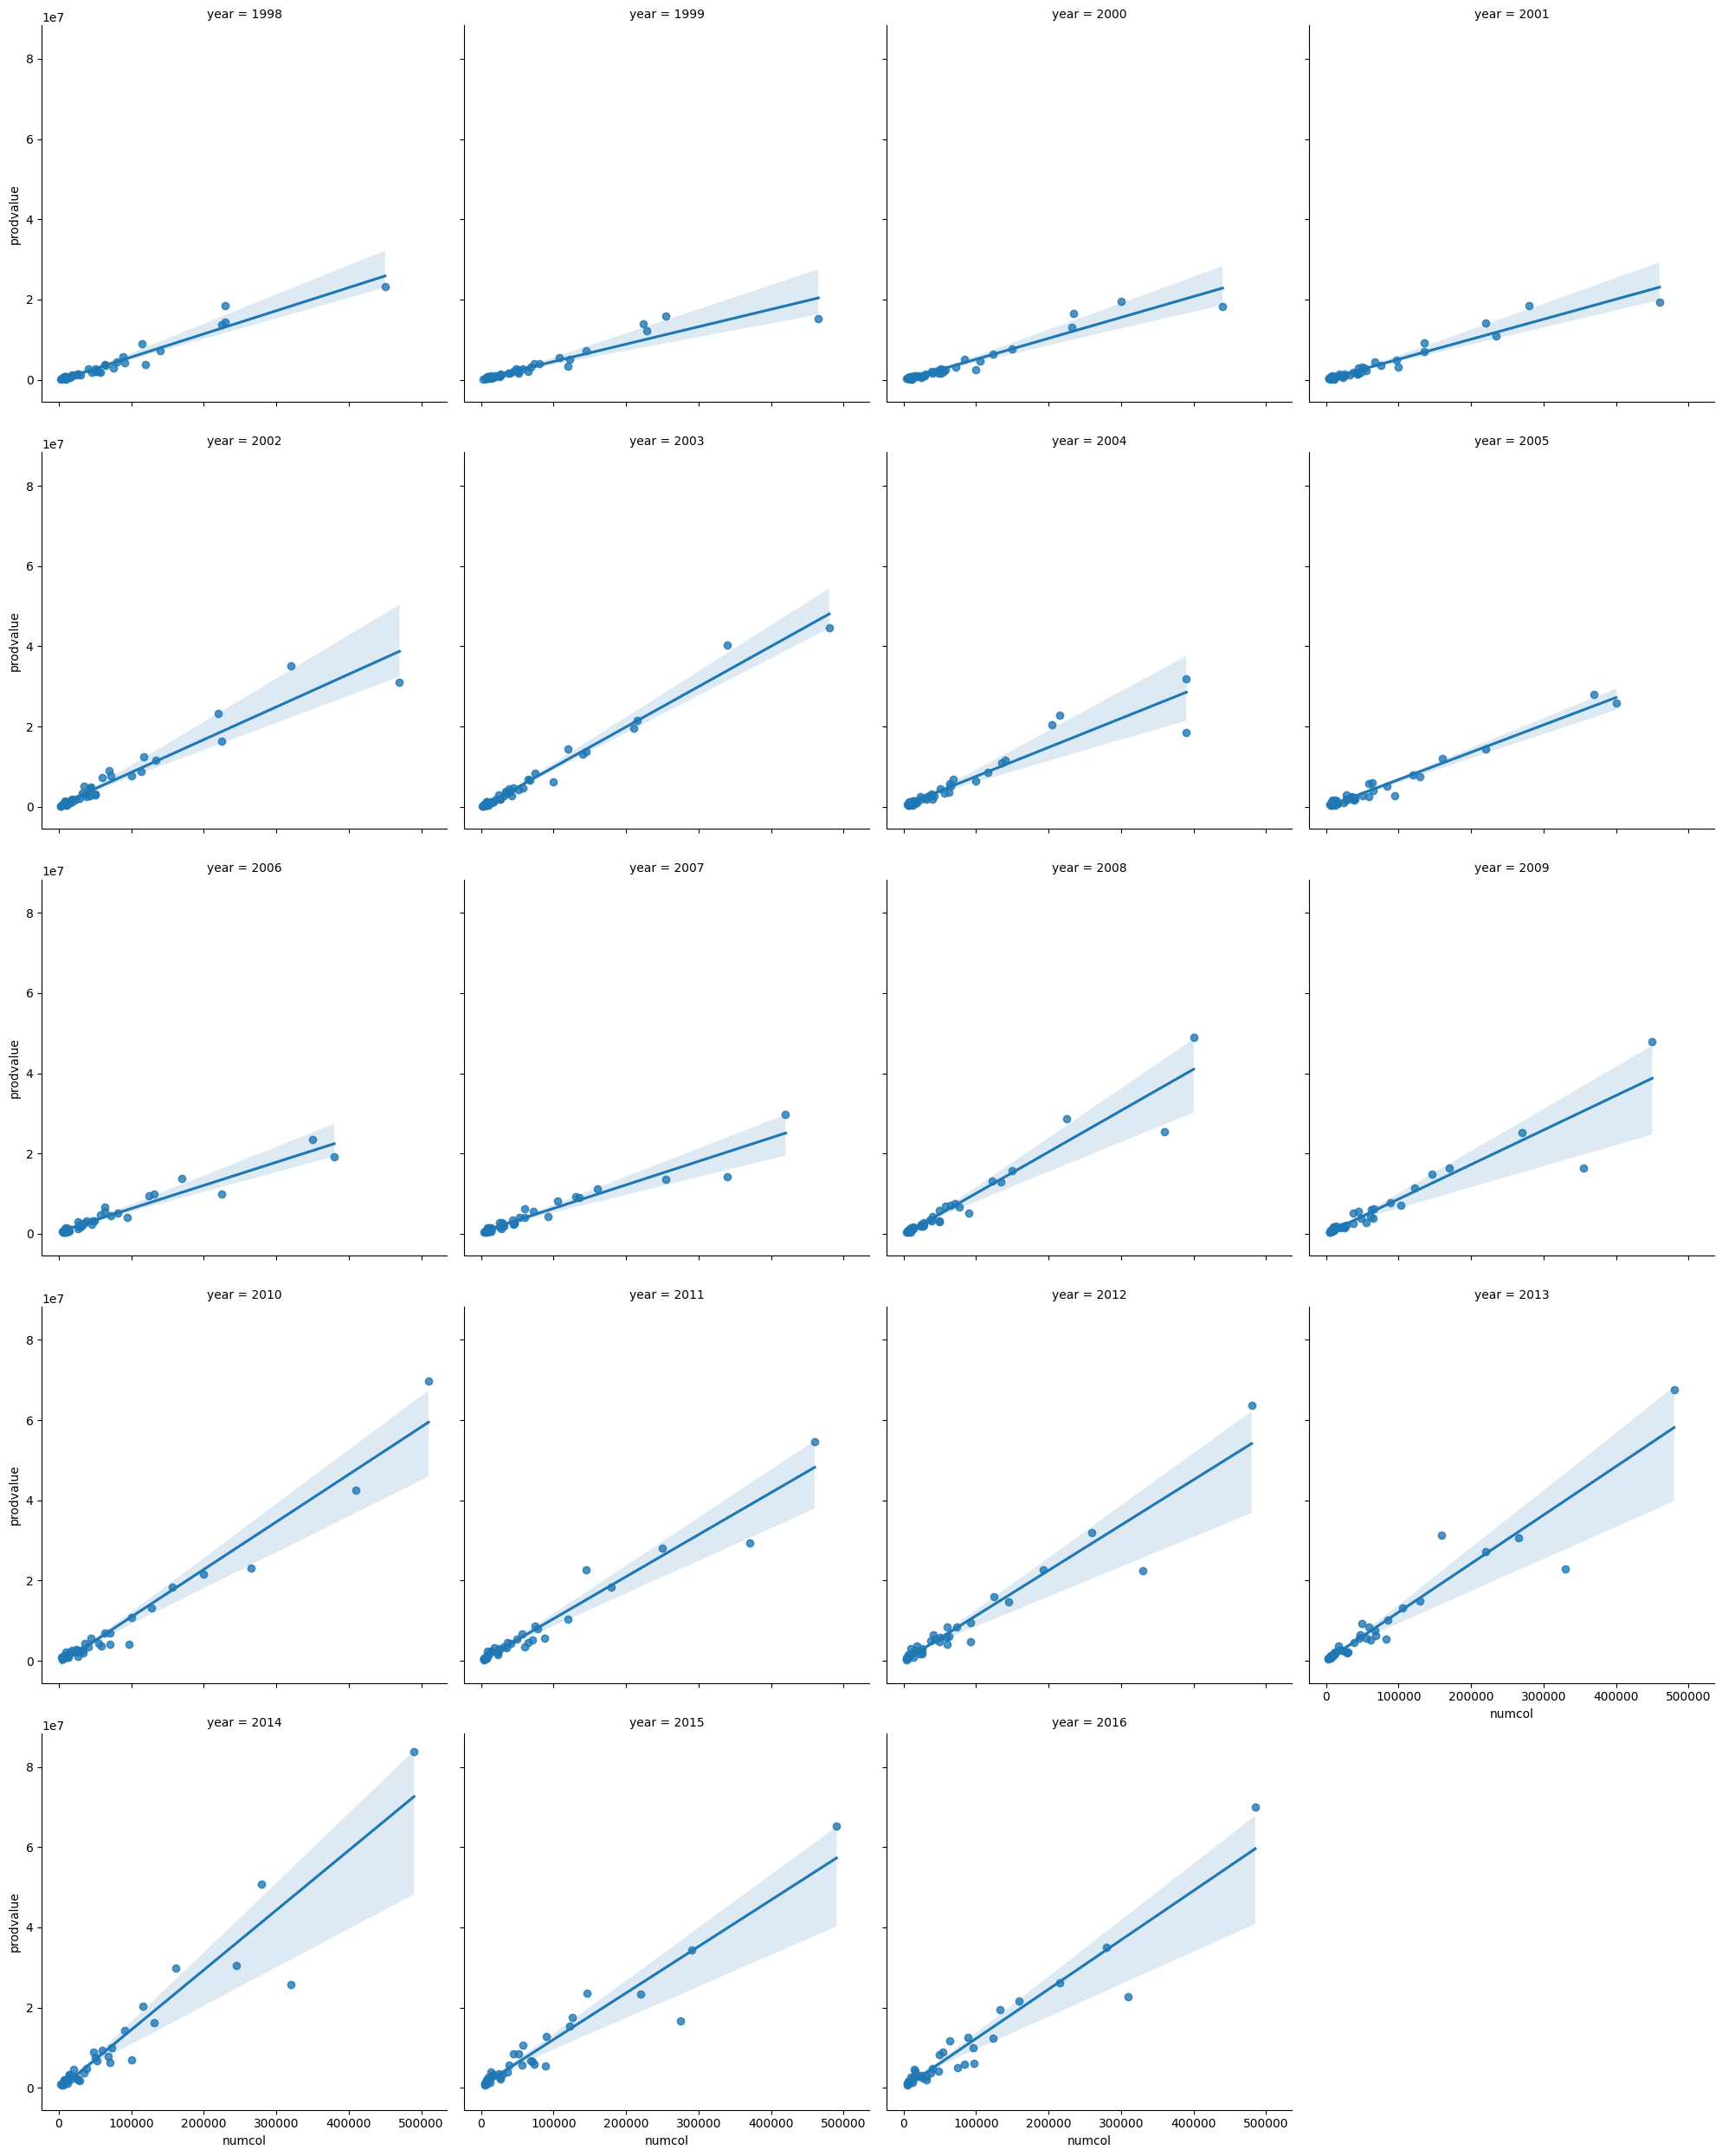

In [49]:
sns.lmplot(data = df, x = 'numcol', y = 'prodvalue', col = 'year', col_wrap=4)

#### Check the distribution of total prodcution across each year using boxplots

<Axes: xlabel='year', ylabel='totalprod'>

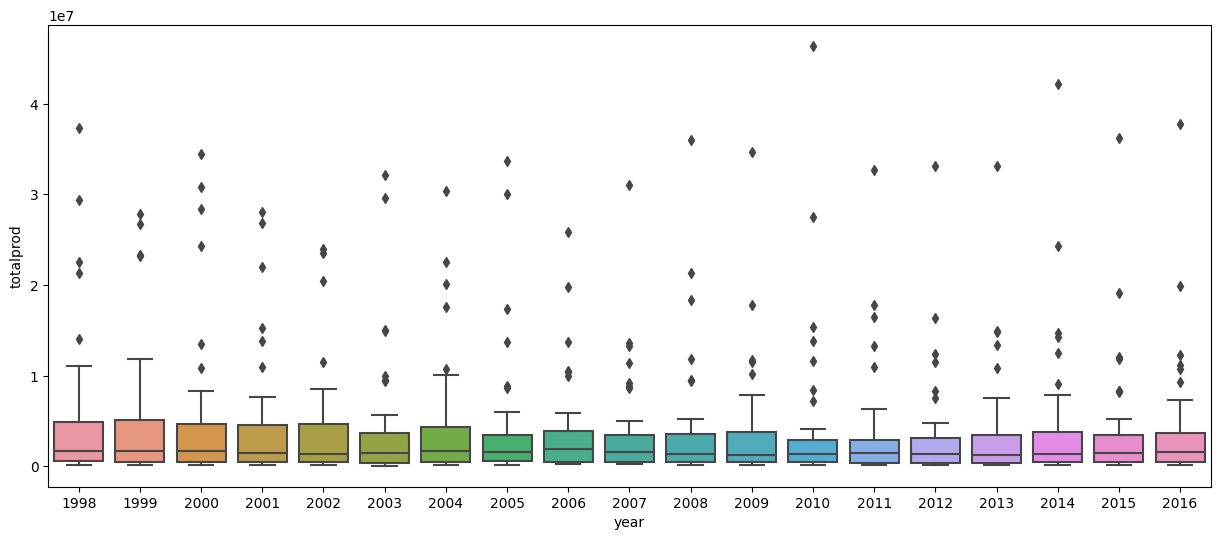

In [52]:
plt.figure(figsize=(15,6))
sns.boxplot(y = df['totalprod'], x = df['year'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012'),
  Text(15, 0, '2013'),
  Text(16, 0, '2014'),
  Text(17, 0, '2015'),
  Text(18, 0, '2016')])

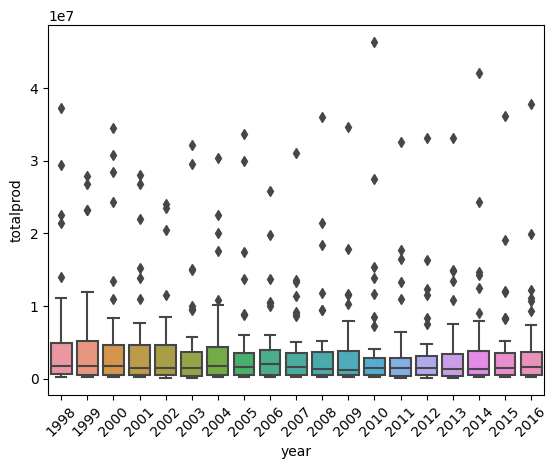

In [55]:
sns.boxplot(y = df['totalprod'], x = df['year'])
plt.xticks(rotation=45)

#### How has the Value in Production changed over the years?

<Axes: xlabel='year', ylabel='prodvalue'>

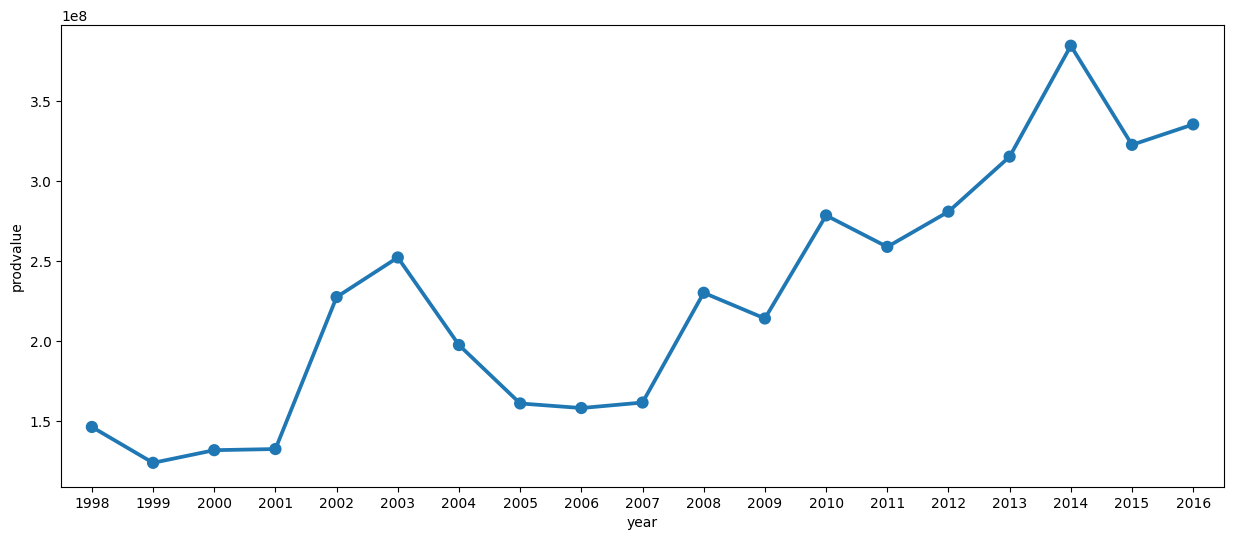

In [58]:
plt.figure(figsize=(15,6))
sns.pointplot(data = df, x = 'year', y = 'prodvalue', errorbar=('ci', False), estimator=sum)

#### What is the linear relationship between Production volume & value over the years?

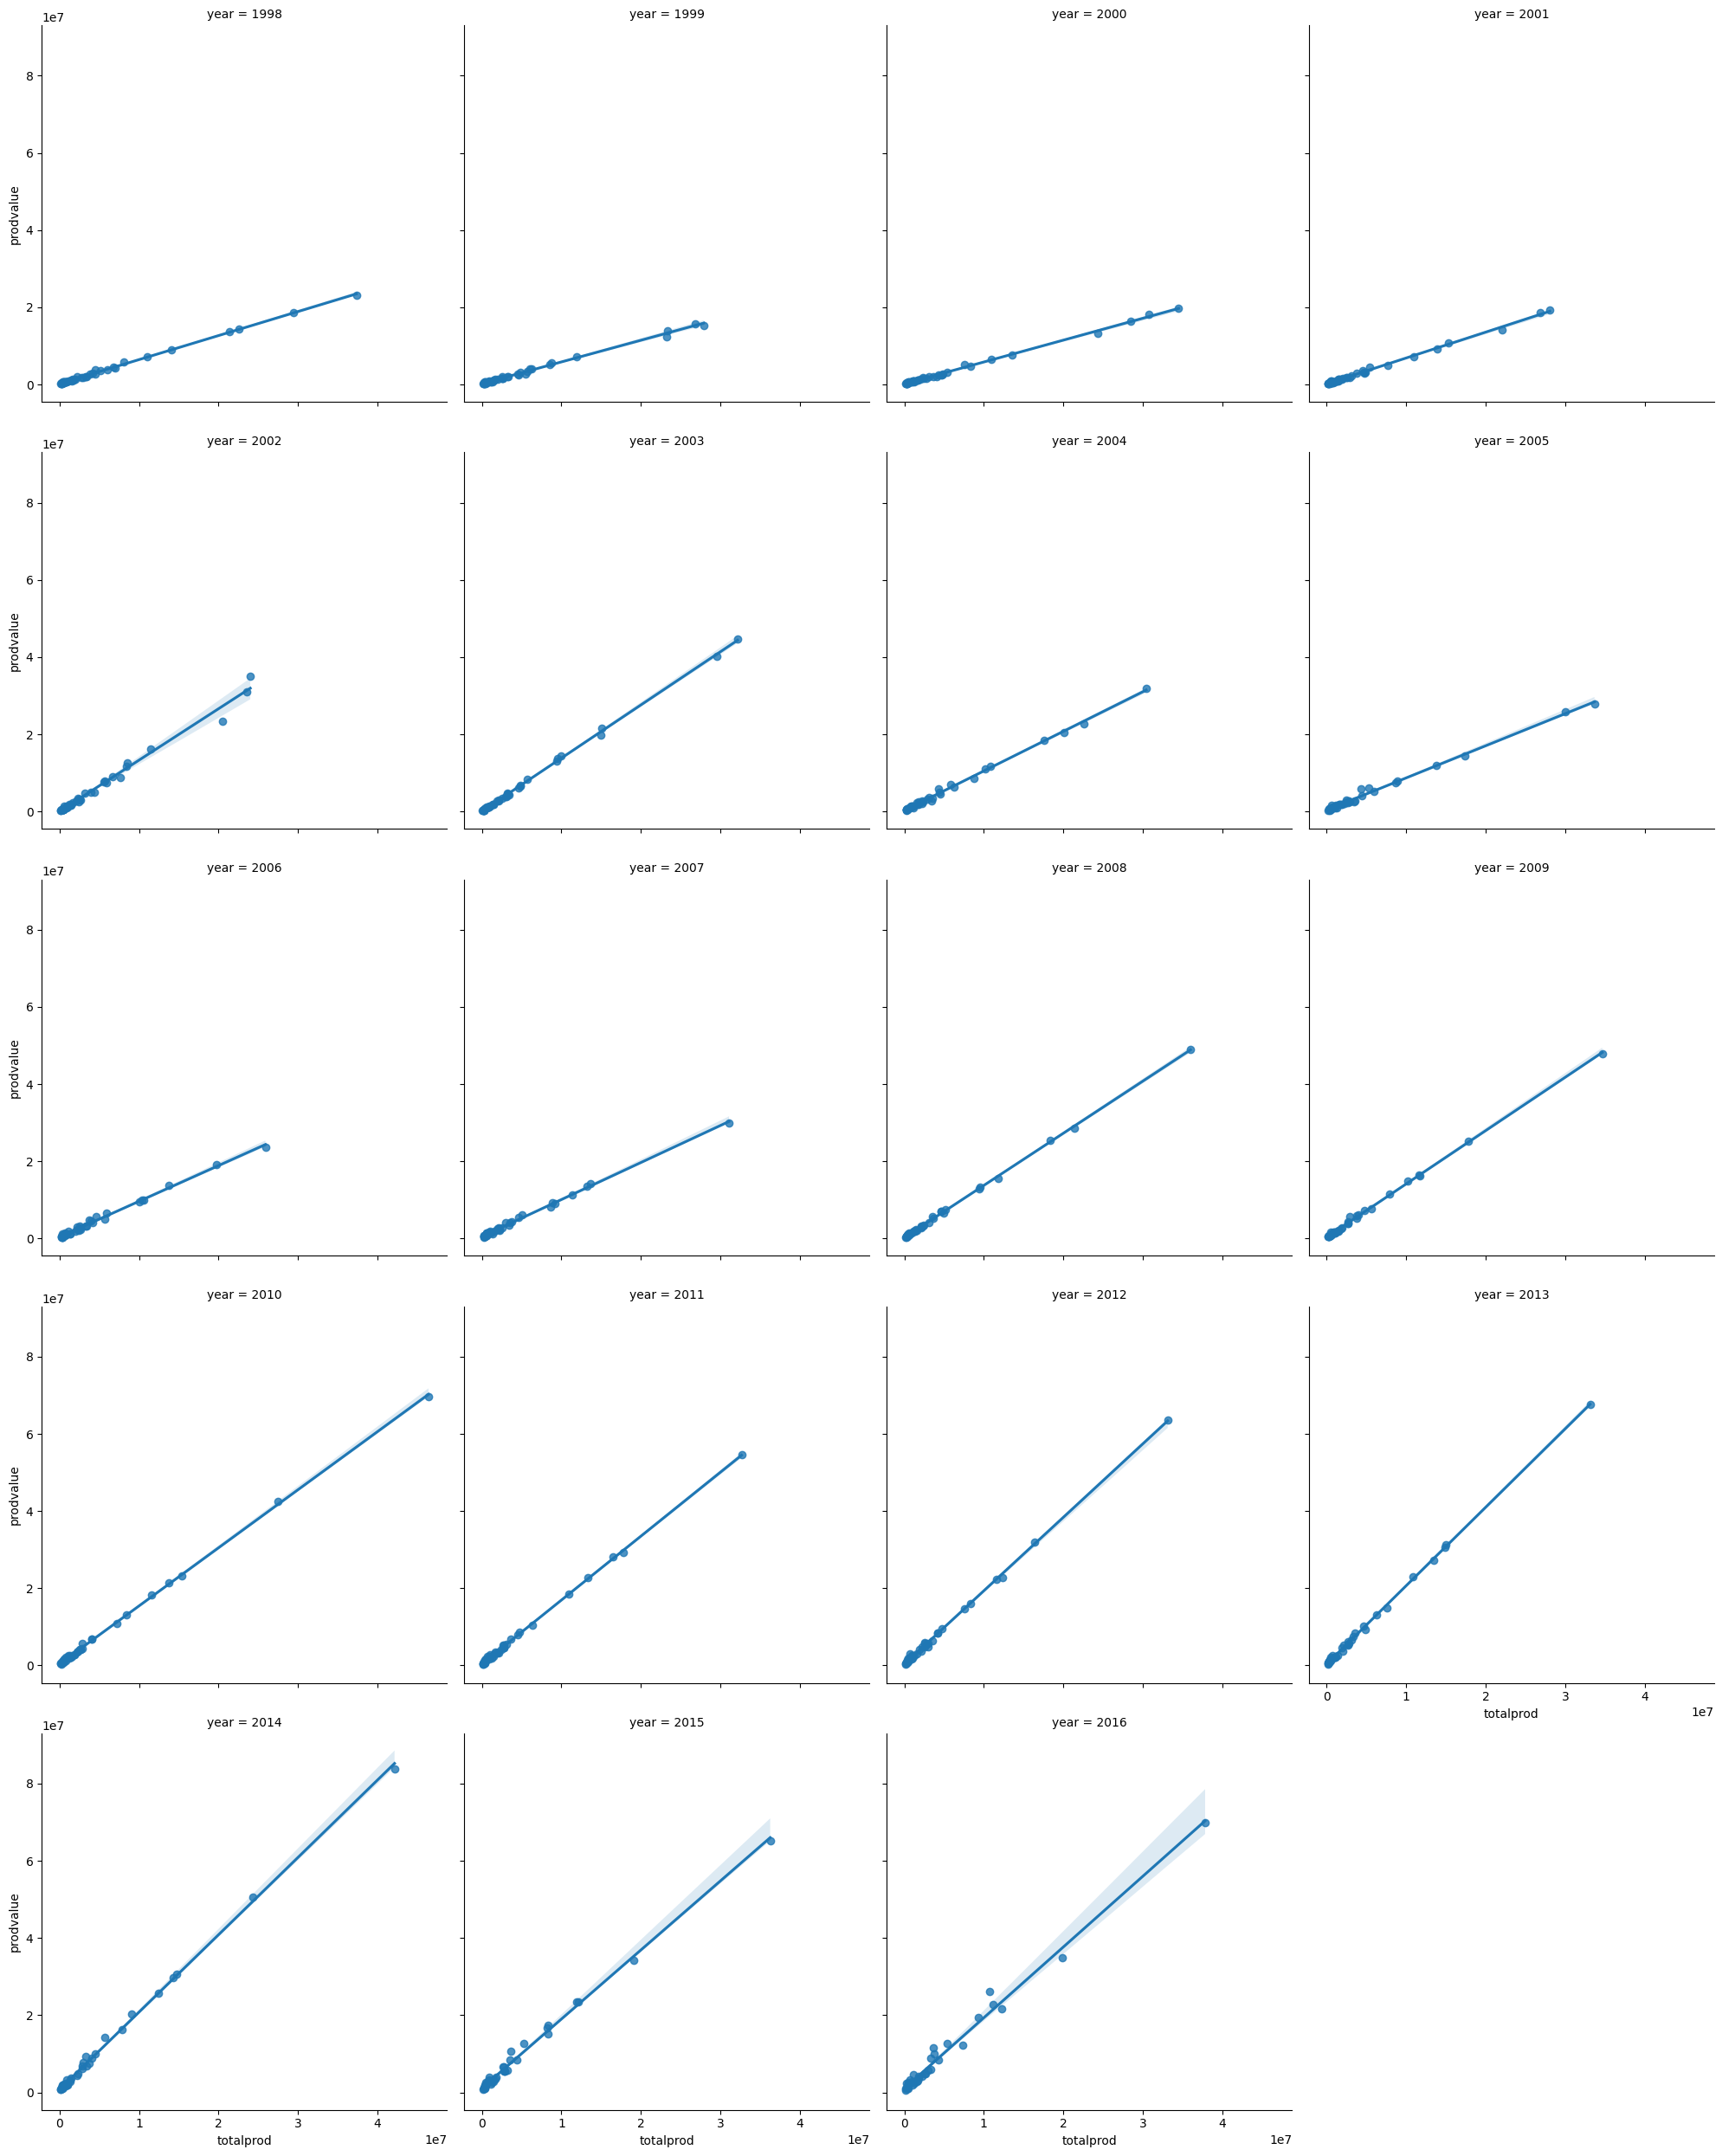

In [60]:
sns.lmplot(data = df, x = 'totalprod', y = 'prodvalue', col = 'year', col_wrap=4)